# Plotting 3D Surfaces

Neste [link](https://likegeeks.com/3d-plotting-in-python/)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps
from scipy.optimize import curve_fit

from mpl_toolkits.mplot3d import Axes3D
from PIL_Functions import img_to_matrix, matrix_to_img, soma_linhas

### Plot function

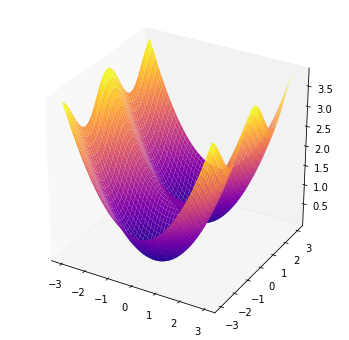

In [2]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.grid(False)

x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)

x, y = np.meshgrid(x, y)

z = np.cos(y)**2 + (x**2)/np.pi

ax.plot_surface(x, y, z, cmap='plasma')

### Plot Data Points

In [6]:
path  = '/Users/thomasgaehtgens/Desktop/LFEA/High Harmonic Generation/Dados/ensaios atenuacao/hhg_Ar12.8mbar_I177_100hz_50deg_100ms.jpg'
img   = Image.open(path)
height, width = img.size
scale = 10

#Diminuir resolução da imagem, para facilitar processamento
img_pix = img.resize((int(height/scale), int(width/scale)), resample=Image.BILINEAR)
# Scale back up using NEAREST to original size
#img     = img_pix.resize(img.size,Image.NEAREST)

matrix = img_to_matrix(img_pix)

Get coordinates from matrix

In [27]:
x = list()
y = list()
z = list()

for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        x.append(i)
        y.append(j)
        z.append(matrix[i][j])

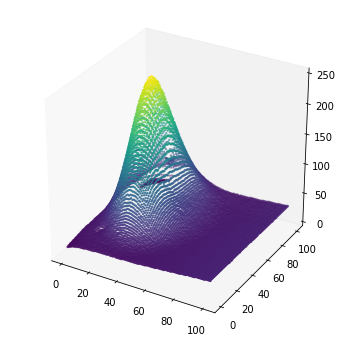

In [4]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.grid(False)

ax.scatter(x, y, z, c=z, s=2)

fig.savefig('CCD_3D.pdf')

### Fitting Data Points

In [34]:
def Gauss_2D(X, Y):
    R = np.sqrt(X**2 + Y**2)
    Z = (1. /(np.sqrt(2 * np.pi)) * np.exp(-.5*R**2))
    return Z 

In [25]:
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)

x, y     = np.meshgrid(x, y)
z        = Gauss_2D(x, y)

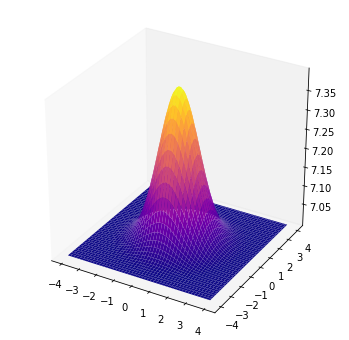

In [32]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.grid(False)

ax.plot_surface(x, y, z, cmap='plasma')

To be continued...

In [35]:
#ACRESCENTADO DIA 2
def Gauss_2D(X, Y, amplitude, x0, sigma_x, y0, sigma_y, offset):
    return offset + amplitude*np.exp(-(((X-x0)**(2)/(2*sigma_x**(2))) + ((Y-y0)**(2)/(2*sigma_y**(2)))))

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.grid(False)

x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
x, y     = np.meshgrid(x, y)

z = Gauss_2D(x, y, amplitude=0.35, x0=0, sigma_x=1, y0=0, sigma_y=1, offset=0)

ax.plot_surface(x, y, z, cmap='plasma')

x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)

x, y     = np.meshgrid(x, y)

ax.scatter(x, y, z, s=1, alpha=0.7)